In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.GraphUtils import GraphUtils
import pydot
from IPython.display import Image, display

In [2]:
gut_microbes = pd.read_csv("../data/raw/gut_16s_abundance.txt", sep = "\t")
samplelist = pd.read_csv("../data/raw/S3_SampleList.csv")
subjects = pd.read_csv("../data/raw/S1_Subjects.csv")

samplelist_gut_healthy = samplelist[(samplelist['Gut_16S'] == 1) & (samplelist['CL4'] == 'Healthy')]
merged_df = pd.merge(gut_microbes, samplelist_gut_healthy, on='SampleID', how='inner')
merged_df = pd.merge(merged_df, subjects, on='SubjectID', how='inner')
IR = merged_df[merged_df['IRIS'] == 'IR']
IS = merged_df[merged_df['IRIS'] == 'IS'] 

genus_col = []
for col in merged_df.columns:
    if "genus" in col:
        genus_col.append(col)

X = merged_df.loc[:, genus_col]
IR_X = IR.loc[:, genus_col]
IS_X = IS.loc[:, genus_col]

In [3]:
g_all, edges_all = fci(X.values, independence_test_method='fisherz')

  0%|          | 0/45 [00:00<?, ?it/s]

X26 --> X2
X3 --> X10
X3 --> X24
X3 --> X26
X3 --> X45
X37 --> X4
X39 --> X4
X40 --> X4
X38 --> X5
X5 --> X43
X45 --> X5
X12 --> X9
X20 --> X10
X12 --> X16
X20 --> X23
X20 --> X24
X24 --> X39
X43 --> X25
X26 --> X37
X37 --> X38


In [5]:
pyd = GraphUtils.to_pydot(g_all, labels=X.columns)

In [6]:
pyd.write_png("test_fci.png")

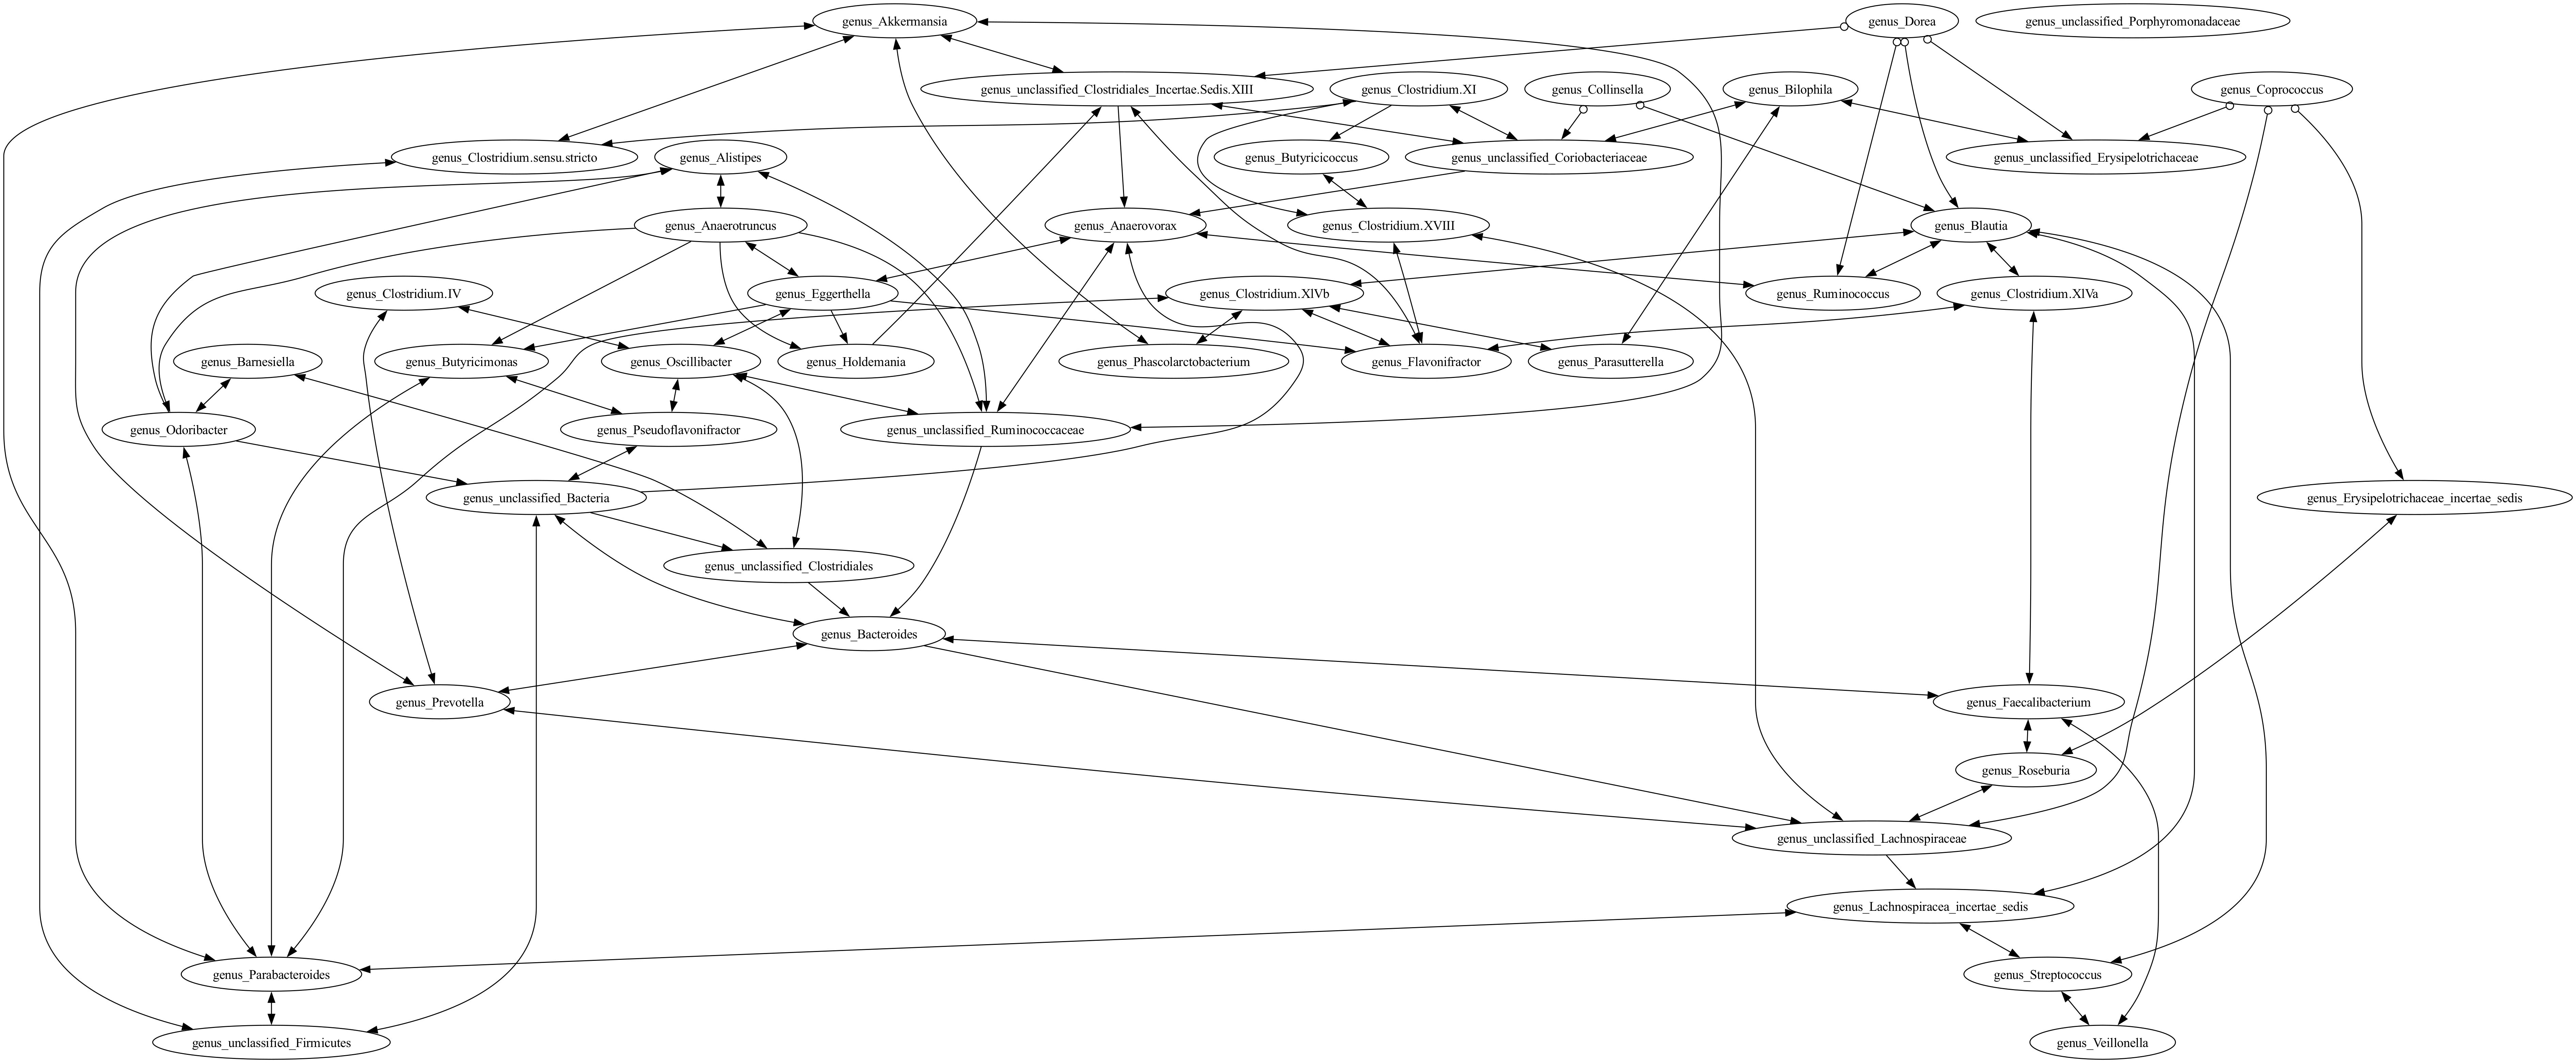

In [7]:
Image("test_fci.png")

In [11]:
g_ir, edges_ir = fci(IR_X.values, independence_test_method='fisherz')

  0%|          | 0/45 [00:00<?, ?it/s]

X30 --> X1
X27 --> X2
X32 --> X3
X45 --> X3
X4 --> X23
X39 --> X4
X4 --> X40
X45 --> X5
X25 --> X8
X23 --> X13
X19 --> X39
X19 --> X40
X19 --> X41
X23 --> X20
X40 --> X20
X32 --> X27
X27 --> X45
X37 --> X32
X32 --> X38
X42 --> X37


In [12]:
g_is, edges_is = fci(IS_X.values, independence_test_method='fisherz')

  0%|          | 0/45 [00:00<?, ?it/s]

X4 --> X45
X7 --> X29
X36 --> X7
X17 --> X8
X8 --> X19
X9 --> X13
X9 --> X41
X23 --> X15
X17 --> X30
X40 --> X17
X19 --> X24
X19 --> X35
X24 --> X35
X36 --> X41
X37 --> X38


In [3]:
subject_info = pd.read_csv("https://raw.githubusercontent.com/nzhang20/DSC180A/refs/heads/main/data/raw/subject_file.csv")
subject_info.head()

,SubjectID,Study,Race,Sex,Age,BMI,SSPG,IR_IS_classification
0,ZIS22OE,HMP,C,F,NaN,NaN,NaN,Unknown
1,ZJBOZ2X,Exercise,C,F,65.30,19.82,NaN,Unknown
2,ZJOSZHK,HMP,C,M,41.43,19.42,NaN,Unknown
3,ZJTKAE3,HMP,C,F,58.65,31.24,162.0,IR
4,ZJXC41N,"HMP, Exercise",B,F,49.69,28.24,75.0,IS


In [4]:
# merge gut_microbes with subject on subject id
gut_microbes = pd.read_csv("https://raw.githubusercontent.com/nzhang20/DSC180A/refs/heads/main/data/raw/gut_16s_abundance.txt", sep = "\t")
# add SubjectID column to gut_microbes
gut_microbes['SubjectID'] = gut_microbes['SampleID'].str.split('-').str[0]
gut_microbes.head()

,SampleID,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,genus_unclassified_Bacteria,genus_unclassified_Clostridiales,genus_unclassified_Clostridiales_Incertae.Sedis.XIII,genus_unclassified_Coriobacteriaceae,genus_unclassified_Erysipelotrichaceae,genus_unclassified_Firmicutes,genus_unclassified_Lachnospiraceae,genus_unclassified_Porphyromonadaceae,genus_unclassified_Ruminococcaceae,SubjectID
0,ZOZOW1T-1010,0.000449,0.650866,0.225080,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,0.097431,0.007883,0.000035,0.000415,0.002386,0.015697,0.027452,0.000000,0.074128,ZOZOW1T
1,ZOZOW1T-1011,0.000176,0.730518,0.184808,0.003900,0.008186,0.070902,0.000176,0.000070,0.730518,...,0.070902,0.008713,0.000141,0.000176,0.000808,0.008608,0.011805,0.000000,0.069215,ZOZOW1T
2,ZOZOW1T-1012,0.000597,0.178364,0.796861,0.000358,0.002788,0.020911,0.000597,0.000119,0.178364,...,0.020911,0.022903,0.000518,0.000398,0.001713,0.000876,0.018362,0.000000,0.615351,ZOZOW1T
3,ZOZOW1T-1015,0.000058,0.740726,0.226516,0.005977,0.001207,0.024971,0.000058,0.000029,0.740726,...,0.024971,0.013046,0.000086,0.000029,0.004109,0.007730,0.043849,0.000029,0.067096,ZOZOW1T
4,ZOZOW1T-1021,0.001113,0.554580,0.364195,0.038358,0.000059,0.041286,0.001113,0.000059,0.554580,...,0.041286,0.006208,0.000117,0.000176,0.000468,0.000996,0.132584,0.015753,0.044624,ZOZOW1T


In [5]:
s3_samplelist = pd.read_csv("https://raw.githubusercontent.com/nzhang20/DSC180A/refs/heads/main/data/raw/S3_SampleList.csv")
clean_s3 = s3_samplelist[(s3_samplelist["Gut_16S"] == 1) & (s3_samplelist["CL4"] == "Healthy")]
clean_s3

,SubjectID,SampleID,Days_Since_Start,CL1,CL2,CL3,CL4,Cytokines,ClinicLabs,Metabolites,Proteins,Transcripts,Gut_16S,Nasal_16S,Num_Type
43,ZOZOW1T,ZOZOW1T-44,-217.0,NaN,UNK_44,NaN,Healthy,0,0,0,0,0,1,1,2
58,ZOZOW1T,ZOZOW1T-59,41.0,NaN,UNK_59,NaN,Healthy,0,1,1,0,1,1,1,5
60,ZOZOW1T,ZOZOW1T-61,96.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,1,0,6
61,ZOZOW1T,ZOZOW1T-62,132.0,NaN,NaN,NaN,Healthy,0,1,1,1,0,1,0,4
62,ZOZOW1T,ZOZOW1T-63,159.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,ZJTKAE3,ZJTKAE3-01,234.0,NaN,NaN,NaN,Healthy,0,0,0,0,1,1,1,3
1080,ZJTKAE3,ZJTKAE3-04,488.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,1,1,7
1086,ZJTKAE3,ZJTKAE3-06,721.0,NaN,NaN,NaN,Healthy,1,1,1,1,1,1,1,7
1087,ZJTKAE3,ZJTKAE3-6011,766.0,NaN,NaN,NaN,Healthy,1,1,1,0,0,1,1,5


In [6]:
merged_df = pd.merge(gut_microbes, clean_s3, on='SubjectID', how='left')
final_df = pd.merge(merged_df, subject_info, on='SubjectID', how='left')
final_df.head()

,SampleID_x,phylum_Actinobacteria,phylum_Bacteroidetes,phylum_Firmicutes,phylum_Proteobacteria,phylum_Verrucomicrobia,phylum_unclassified_Bacteria,class_Actinobacteria,class_Bacilli,class_Bacteroidia,...,Gut_16S,Nasal_16S,Num_Type,Study,Race,Sex,Age,BMI,SSPG,IR_IS_classification
0,ZOZOW1T-1010,0.000449,0.650866,0.22508,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,1.0,1.0,2.0,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
1,ZOZOW1T-1010,0.000449,0.650866,0.22508,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,1.0,1.0,5.0,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
2,ZOZOW1T-1010,0.000449,0.650866,0.22508,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,1.0,0.0,6.0,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
3,ZOZOW1T-1010,0.000449,0.650866,0.22508,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,1.0,0.0,4.0,"HMP, Exercise",C,M,59.48,21.47,91.5,IS
4,ZOZOW1T-1010,0.000449,0.650866,0.22508,0.007364,0.015835,0.097431,0.000449,0.000138,0.650866,...,1.0,0.0,6.0,"HMP, Exercise",C,M,59.48,21.47,91.5,IS


In [7]:
is_df = final_df[final_df['IR_IS_classification'] == 'IS']
ir_df = final_df[final_df['IR_IS_classification'] == 'IR']

In [8]:
# include only genuses
genus_cols = [col for col in merged_df.columns if 'genus' in col]
genus_cols

['genus_Akkermansia',
 'genus_Alistipes',
 'genus_Anaerotruncus',
 'genus_Anaerovorax',
 'genus_Bacteroides',
 'genus_Barnesiella',
 'genus_Bilophila',
 'genus_Blautia',
 'genus_Butyricicoccus',
 'genus_Butyricimonas',
 'genus_Clostridium.IV',
 'genus_Clostridium.XI',
 'genus_Clostridium.XVIII',
 'genus_Clostridium.XlVa',
 'genus_Clostridium.XlVb',
 'genus_Clostridium.sensu.stricto',
 'genus_Collinsella',
 'genus_Coprococcus',
 'genus_Dorea',
 'genus_Eggerthella',
 'genus_Erysipelotrichaceae_incertae_sedis',
 'genus_Faecalibacterium',
 'genus_Flavonifractor',
 'genus_Holdemania',
 'genus_Lachnospiracea_incertae_sedis',
 'genus_Odoribacter',
 'genus_Oscillibacter',
 'genus_Parabacteroides',
 'genus_Parasutterella',
 'genus_Phascolarctobacterium',
 'genus_Prevotella',
 'genus_Pseudoflavonifractor',
 'genus_Roseburia',
 'genus_Ruminococcus',
 'genus_Streptococcus',
 'genus_Veillonella',
 'genus_unclassified_Bacteria',
 'genus_unclassified_Clostridiales',
 'genus_unclassified_Clostridiales

In [9]:
# data cleaning
full_df = final_df[genus_cols]
is_df = is_df[genus_cols]
ir_df = ir_df[genus_cols]

In [10]:
# data input for FCI must be numpy array
full_data = np.array(full_df)
is_data = np.array(is_df)
ir_data = np.array(ir_df)

In [15]:
len(ir_data)

2156

In [11]:
# FCI for all

from causallearn.search.ConstraintBased.FCI import fci

# or customized parameters
g, edges = fci(full_data, independence_test_method='fisherz')

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g, labels=full_df.columns)
pdy.write_png('full_simple_test.png')

  0%|          | 0/45 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from IPython.display import Image

# Display image in notebook
Image("full_simple_test.png")

In [ ]:
# IS FCI

from causallearn.search.ConstraintBased.FCI import fci

# or customized parameters
g, edges = fci(is_data, independence_test_method='fisherz')

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g, labels=is_df.columns)
pdy.write_png('is_simple_test.png')


In [ ]:
from IPython.display import Image

# Display image in notebook
Image("is_simple_test.png")


In [ ]:
from causallearn.search.ConstraintBased.FCI import fci

# or customized parameters
g, edges = fci(ir_data, independence_test_method='fisherz')

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g, labels=ir_df.columns)
pdy.write_png('ir_simple_test.png')


  0%|          | 0/45 [00:00<?, ?it/s]

In [ ]:
from IPython.display import Image

# Display image in notebook
Image("ir_simple_test.png")
